<a href="https://colab.research.google.com/github/jigjid/github_task/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Selection of features for practice

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("train.csv", encoding="shift-jis")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:

data1 = df[["GrLivArea", "YearBuilt"]]
target1 = df["SalePrice"]
print(data1)
print(target1)

      GrLivArea  YearBuilt
0          1710       2003
1          1262       1976
2          1786       2001
3          1717       1915
4          2198       2000
...         ...        ...
1455       1647       1999
1456       2073       1978
1457       2340       1941
1458       1078       1950
1459       1256       1965

[1460 rows x 2 columns]
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [4]:
import numpy as np
data = data1.to_numpy()
target = target1.to_numpy()
print(type(data))
print(type(target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


[Problem 2] Estimation and evaluation by linear regression

In [5]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=123, test_size=0.2)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.fit_transform(data_test)
lr = LinearRegression()
lr.fit(data_train, target_train)
target_pred = lr.predict(data_test)
target_pred
     

array([268241.4641768 , 128537.62048776, 237761.76924221, 271307.56577637,
       156407.62721576, 219348.11032283, 314726.72562432, 130091.40714487,
       132011.06134125, 180282.27106066, 176313.94116294, 245784.82723771,
       173085.02682668, 118969.91532051, 277704.26281959, 174143.00220299,
       195180.17323384, 287971.14148241, 247316.26532895, 183092.09606495,
       131051.23424306, 201965.39379438, 108401.21875262, 120648.57582893,
       248069.1973831 , 163396.51740326, 207709.38088838, 228768.5930729 ,
        99121.50758557, 145379.59925   , 145703.45830875, 212144.1078425 ,
       129202.69533941, 193479.47157174, 241604.61046424, 216244.68466226,
       168406.08076752, 309333.32316226, 156017.644696  ,  82269.5451599 ,
       129087.49773933, 225281.94313891, 183283.70820166, 182113.76064235,
       196667.52901774, 105993.12634616, 242971.46940416, 241292.50148355,
       248498.27037851,  94416.98754346, 227881.64768208, 197291.74697912,
       135070.40469447, 1

In [6]:

from sklearn.metrics import mean_squared_error
mean_squared_error(target_test, target_pred,  squared=False)

42960.86386123902

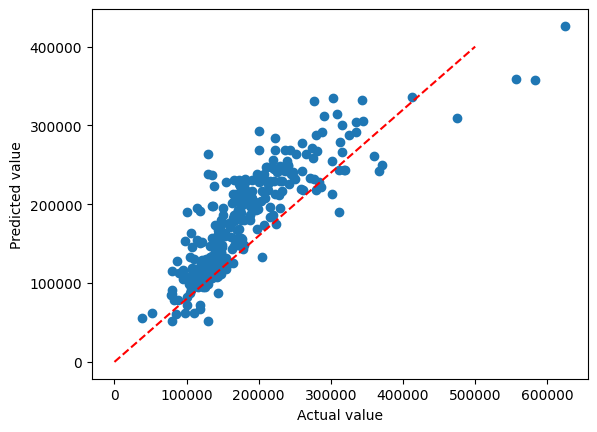

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(target_test, target_pred)
ax.plot((0,500000), (0,400000), linestyle='dashed', color="red")
ax.set_xlabel("Actual value")
ax.set_ylabel("Predicted value")
plt.show()

[Problem 3] Comparison of methods

In [8]:
X = data_train
y = target_train
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)
svm_pred = regr.predict(data_test)
mean_squared_error(target_test, svm_pred,  squared=False)

80963.73159674357

In [9]:

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X, y, cv=10)
regressor.fit(X, y)
dt_pred = regressor.predict(data_test)
mean_squared_error(target_test, dt_pred,  squared=False)

54738.61698525918

In [10]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(X, y)
rf_pred = reg.predict(data_test)
mean_squared_error(target_test, rf_pred,  squared=False)

51437.95186927183

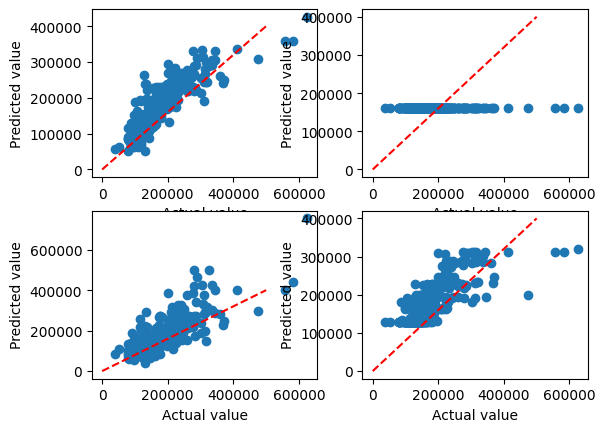

In [11]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(target_test, target_pred)
ax1.plot((0,500000), (0,400000), linestyle='dashed', color="red")
ax1.set_xlabel("Actual value")
ax1.set_ylabel("Predicted value")
ax2.scatter(target_test, svm_pred)
ax2.plot((0,500000), (0,400000), linestyle='dashed', color="red")
ax2.set_xlabel("Actual value")
ax2.set_ylabel("Predicted value")
ax3.scatter(target_test, dt_pred)
ax3.plot((0,500000), (0,400000), linestyle='dashed', color="red")
ax3.set_xlabel("Actual value")
ax3.set_ylabel("Predicted value")
ax4.scatter(target_test, rf_pred)
ax4.plot((0,500000), (0,400000), linestyle='dashed', color="red")
ax4.set_xlabel("Actual value")
ax4.set_ylabel("Predicted value")
plt.show()

[Problem 4] (Advanced task) Learning using other feature values

Null values of the data is 
GrLivArea    0
YearBuilt    0
LotArea      0
SalePrice    0
dtype: int64
Feature added: root mean square error:1788152399.389184
Feature added: root mean square error:42286.55104627456


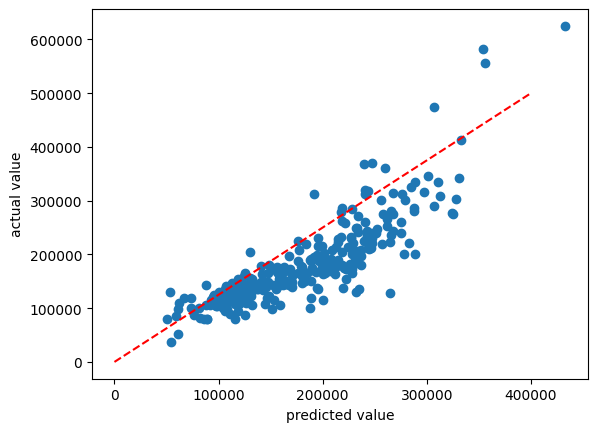

In [14]:
data = df.loc[:,['GrLivArea', 'YearBuilt' , 'LotArea','SalePrice']]

print("Null values of the data is \n{}".format(data.isnull().sum()))


X = data.loc[:,['GrLivArea', 'YearBuilt', 'LotArea']].to_numpy()
y = data.loc[:, 'SalePrice'].to_numpy()

# Estimation and evaluation by linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Feature added: root mean square error:{}".format(mse))
mse = mean_squared_error(y_test, y_pred, squared= False)
print("Feature added: root mean square error:{}".format(mse))

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0, 400000), (0, 500000), linestyle='dashed', color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()